In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import warnings 
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [2]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style="whitegrid")

### Data Loading

In [4]:
df = pd.read_csv(r"C:\Users\USER\Desktop\FOLAKEMI\Final Dataset.csv")


In [5]:
df.head(n=2)

,Zip Code,City,State,Metro,CountyName,SizeRank,1996,1997,1998,1999,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
0,10013,New York,NY,New York,New York,1744,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,$0.00,31.0,1125.0,0.0,0.0,0.0,248.0
1,10013,New York,NY,New York,New York,1744,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,$0.00,1.0,1125.0,4.0,6.0,6.0,6.0


In [6]:
#df.columns.values

In [7]:
df.drop(['Metro','market','City','State'],axis = 1, inplace = True)
df.drop(['1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
      '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',],axis = 1,inplace = True)

### Data Analysis

Adding columns of our analysis

In [8]:
# ##Adding new column Avg_nights by adding minimum_nights and maximum_night and averaging them together
avg_nights = []
for i in range(len(df)):
#     (df['minimum_nights'][i])
    avg_nights.append((df['minimum_nights'][i] + df['maximum_nights'][i])/2)
df['Avg_nights'] = avg_nights

In [9]:
#THis cell is just for some data cleaning
df['price'] = df['price'].astype(str).str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(str).str.replace('$','')
df['cleaning_fee'] = df['cleaning_fee'].astype(str).str.replace(',','')
df['security_deposit'] = df['security_deposit'].astype(str).str.replace('$','')
df['security_deposit'] = df['security_deposit'].astype(str).str.replace(',','')


In [10]:
# ##Adding new column price_per_night by athe following formula
price_per_night = []
for i in range(len(df)):
#     print(i)
    price_per_night.append((float(df['Avg_nights'][i]) * float(df['price'][i]))
                           +float(df['cleaning_fee'][i])+float(df['security_deposit'][i]))
df['price_per_night'] = price_per_night

In [11]:
# ##Adding new column total_cost by athe following formula
total_cost = []
for i in range(len(df)):
    total_cost.append((float(df['price_per_night'][i]) * float(df['availability_365'][i])))
df['total_cost'] = total_cost

In [12]:
# ##Adding new column profit by athe following formula
profit = []
for i in range(len(df)):
    profit.append(float(df['2016'][i])- (float(df['total_cost'][i])))
df['profit'] = profit

### Filtering our data only by 2 bedrooms

In [13]:
#print(df)
df= df.loc[df['bedrooms'] == 2.0]

In [14]:
df['price_per_night'].isna().head()

0      True
1      True
16     True
27    False
33     True
Name: price_per_night, dtype: bool

#### Dropping the Nan values based on the 4 columns we just added to the dataframe

In [15]:
df.dropna(subset=['Avg_nights','price_per_night','total_cost','profit'],inplace = True)

Sorting the dataframe by profit column to get the zip codes by highest profit at the top

In [16]:
df.sort_values(by = 'profit',ascending = False,inplace = True)

In [17]:
df.head(1)

,Zip Code,CountyName,SizeRank,2016,2017,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,Avg_nights,price_per_night,total_cost,profit
283,10011,New York,15,27346700.0,NaN,"Chelsea, New York, NY 10011, United States",Chelsea,Chelsea,Manhattan,New York,...,3.0,1125.0,0.0,0.0,0.0,0.0,564.0,169350.0,0.0,27346700.0


Saving our final results to Data.csv which will have our final resultant data

In [18]:
df.to_csv("Data.csv")

In [19]:
df['Zip Code'].unique()

array([10011, 10003, 11201, 10014, 11231], dtype=int64)

### Visualization 

#### Bar plot

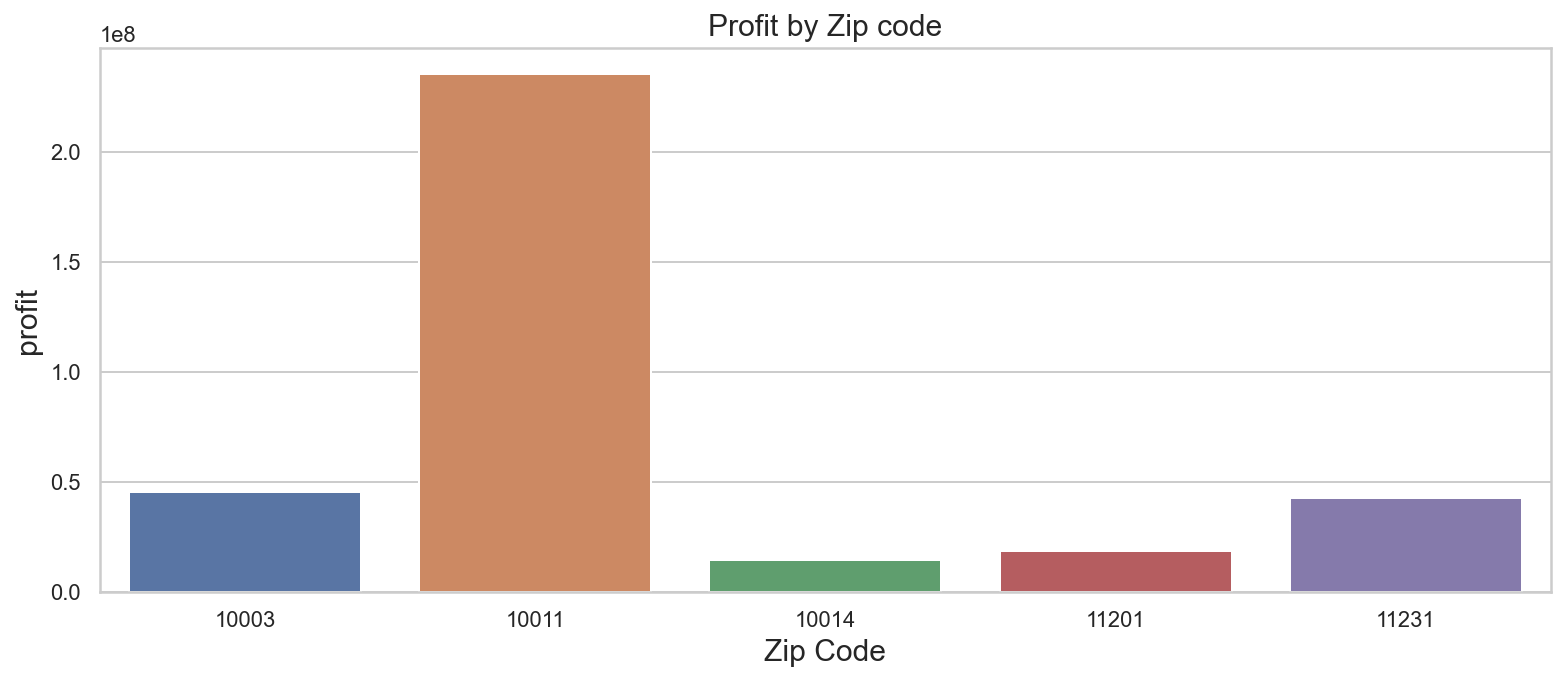

In [42]:
df1_plot = pd.DataFrame(df[['Zip Code','profit']].groupby("Zip Code")["profit"].sum())
df1_plot.reset_index(drop= False,inplace = True)
# print(df1_plot.columns)
plt.figure(figsize=(13,5))
g = sns.barplot(data = df1_plot,x = "Zip Code", y = "profit",ci=None)
g.set_xticklabels(g.get_xticklabels(),rotation=0)
plt.title('Profit by Zip code',fontsize=15)
plt.xlabel('Zip Code',fontsize = 15)
plt.ylabel('profit',fontsize = 15)
# plt.legend(bbox_to_anchor =(1.00, 1.15), ncol = 2)
plt.show()

This bar graph shows us that the zip code 10011 (zip for new york) has the highest profits in year 2016 as compare to zip 10003,10014,11201 and 11231. There is huge difference of profits among the highest profit number and the other combined. We will see how much the difference is in next sectiona

In [18]:
# df_bar = pd.DataFrame(df[['Zip Code','profit']].groupby("Zip Code")["profit"].sum())
# df_bar.reset_index(drop= False,inplace = True)
# df_bar.columns

### Pie Chart

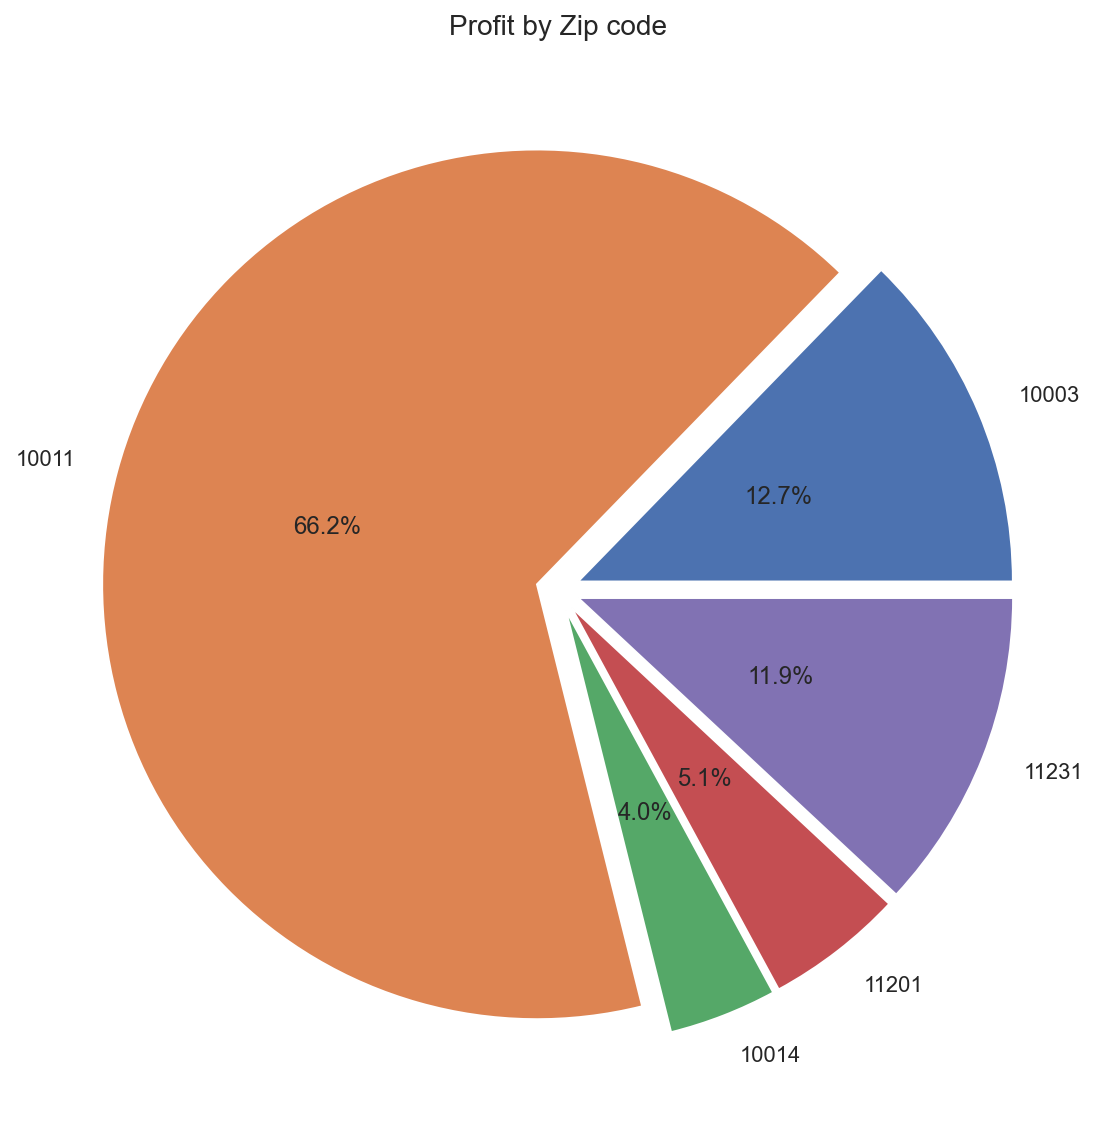

In [40]:
df1_plot = df[['Zip Code','profit']]
#groupby the data by delivery type
data = df1_plot.groupby("Zip Code")["profit"].sum()
pie, ax = plt.subplots(figsize=[15,10])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Profit by Zip code", fontsize=14);
# pie.savefig("Chest_Pain.png")

As we noticed above in bar plot that the zip code 10011 has the highest profits amongst all other zip codes, here we can see that the single new york zip has 66.2 

### Map 

In [41]:
#data=dict(type='choropleth',locations=df1_plot['Zip Code'],z=df1_plot['profit'],text=df1_plot['Zip Code'],colorbar={'title':'profit'})
#layout= dict(title='profit',geo=dict(showframe=False,projection={'type':'natural earth'}))
#choromap=dict(data=data,layout=layout)
#iplot(choromap,validate=False)


In [42]:
#Create the choropleth
fig = go.Figure(data=go.Choropleth(locations=df['Zip Code'],
                                   locationmode='USA-states',
                                   z=df['profit'],colorscale='plasma_r',marker_line_color='black',marker_line_width=0.5,))

In [96]:

fig.update_layout(title_text="Profit by Zip Code",title_x=0.5,geo=dict(showframe=False,showcoastlines=False,))
fig.show()

In [22]:
df1_plot=df1_plot.reset_index()

In [23]:
data = df1_plot.groupby("Zip Code")["profit"].sum()

In [24]:
df= pd.DataFrame(data)

In [25]:
df.head(2)

,profit
Zip Code,
10003,45250860.0
10011,235357080.5


In [26]:
df.reset_index(inplace=True)

In [27]:
df.head()

,Zip Code,profit
0,10003,45250860.0
1,10011,235357080.5
2,10014,14308575.0
3,11201,18285770.0
4,11231,42497300.0


In [28]:
df.to_csv('dfmap.csv',index=False) #Save it to file so we can add the latitude and longitude columns

In [44]:
df=pd.read_csv(r'dfmap.csv')

In [45]:
df.head(3)

,Zip Code,profit,latitude,longitude
0,10003,45250860.0,40.732254,-73.987411
1,10011,235357080.5,40.735295,-73.994432
2,10014,14308575.0,40.736614,-74.009447


In [46]:
df['Zip Code']=df['Zip Code'].astype(str)
df['latitude']=df['latitude'].astype(str)
df['longitude']=df['longitude'].astype(str) #Covert the Zip Code, latitude and longitude columns to string so you can work with them

In [47]:
import folium
from folium.plugins import MarkerCluster

In [48]:
map= folium.Map(location=[40.693943,-73.985880],default_zoom_start=12)

In [49]:
map.choropleth(geo_data="nyu-2451-34509-geojson.json", data=df,columns=['Zip Code','profit'],Key_on='feature.properties.postalCode',fill_color='BuPu',fill_opacity=0.7,line_opacity=0.2)

In [50]:
#Add a marker for every record in clustering view
marker_cluster=MarkerCluster().add_to(map)

In [51]:
for i in range(df.shape[0]):
    location= [df['latitude'][i],df['longitude'][i]]
    folium.Marker(location,popup="""<i>profit:<br><br>$ {}</br><br>""".format(df['profit'][i])).add_to(marker_cluster)

In [52]:
map

In [53]:
map.save('profitmap.html')